# Download Imaging Data

In [1]:
# Step 1
# Download data to get started using script from https://github.com/preprocessed-connectomes-project/abide - SRL 09/06/2016

# Run in python 2 in terminal
#python download_abide_preproc.py -d reho -p cpac -s filt_noglobal -o reho -t PITT



# Read phenotypic csv file

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
demograf=pd.read_csv('Phenotypic_V1_0b_preprocessed1.csv')
demograf.shape

OSError: File b'Phenotypic_V1_0b_preprocessed1.csv' does not exist

In [3]:
# Removed rater related columns and columns related QA,
demograf.drop(['qc_rater_1', 'qc_notes_rater_1', 'qc_anat_rater_2', 'qc_anat_notes_rater_2', 'qc_func_rater_2','qc_func_notes_rater_2', 'qc_anat_rater_3', 'qc_anat_notes_rater_3', 'qc_func_rater_3','qc_func_notes_rater_3'],inplace=True,axis=1)

In [4]:
demograf.shape

(1112, 96)

In [5]:
# Find data that we want to use
nfeatures=demograf.apply(lambda x:x.nunique())
inds = nfeatures[nfeatures > 1].index
demograf=demograf.loc[:,inds]
demograf.shape

(1112, 96)

In [6]:
nfeatures

Unnamed: 0                   1112
Unnamed: 0.1                 1112
SUB_ID                       1112
X                            1112
subject                      1112
SITE_ID                        20
FILE_ID                      1036
DX_GROUP                        2
DSM_IV_TR                       6
AGE_AT_SCAN                   709
SEX                             2
HANDEDNESS_CATEGORY             6
HANDEDNESS_SCORES             106
FIQ                           124
VIQ                            88
PIQ                            84
FIQ_TEST_TYPE                  13
VIQ_TEST_TYPE                  12
PIQ_TEST_TYPE                  13
ADI_R_SOCIAL_TOTAL_A           27
ADI_R_VERBAL_TOTAL_BV          24
ADI_RRB_TOTAL_C                15
ADI_R_ONSET_TOTAL_D             7
ADI_R_RSRCH_RELIABLE            3
ADOS_MODULE                     4
ADOS_TOTAL                     24
ADOS_COMM                      10
ADOS_SOCIAL                    16
ADOS_STEREO_BEHAV              10
ADOS_RSRCH_REL

In [7]:
demograf.drop(['anat_cnr', 'anat_efc', 'anat_fber', 'anat_fwhm', 'anat_qi1', 'anat_snr', 'func_efc', 'func_fber', 'func_fwhm', 'func_dvars', 'func_outlier', 'func_quality', 'func_mean_fd', 'func_num_fd', 'func_perc_fd', 'func_gsr'],inplace=True,axis=1)


In [8]:
demograf.shape

(1112, 80)

In [9]:
demograf.drop(['Unnamed: 0', 'Unnamed: 0.1', 'X','FILE_ID','FIQ_TEST_TYPE','PIQ_TEST_TYPE','VIQ_TEST_TYPE'],inplace=True,axis=1)

In [10]:
demograf.shape

(1112, 73)

In [11]:
nodata = demograf.apply(lambda x: x.isnull().sum()) # find NaNs
nodata.sort_values(ascending=False) # sort by how mcny NaNs
print(nodata.shape)

(73,)


In [12]:
#No of No Datas in each column
nodata

SUB_ID                                0
subject                               0
SITE_ID                               0
DX_GROUP                              0
DSM_IV_TR                             0
AGE_AT_SCAN                           0
SEX                                   0
HANDEDNESS_CATEGORY                 315
HANDEDNESS_SCORES                   742
FIQ                                  35
VIQ                                 177
PIQ                                 159
ADI_R_SOCIAL_TOTAL_A                700
ADI_R_VERBAL_TOTAL_BV               700
ADI_RRB_TOTAL_C                     700
ADI_R_ONSET_TOTAL_D                 781
ADI_R_RSRCH_RELIABLE                701
ADOS_MODULE                         577
ADOS_TOTAL                          670
ADOS_COMM                           695
ADOS_SOCIAL                         695
ADOS_STEREO_BEHAV                   734
ADOS_RSRCH_RELIABLE                 732
ADOS_GOTHAM_SOCAFFECT               795
ADOS_GOTHAM_RRB                     795


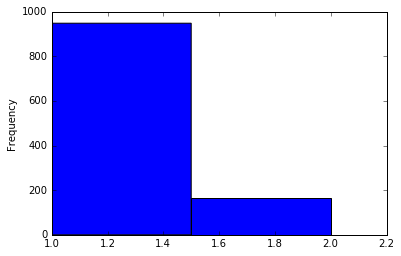

In [15]:
demograf['SEX'].plot(kind='hist',bins=2)

In [16]:
demograf.groupby(['SEX','DX_GROUP']).count()['SUB_ID']

SEX  DX_GROUP
1    1           474
     2           474
2    1            65
     2            99
Name: SUB_ID, dtype: int64

## QUESTION

Most subjects are males, very few females. Seem to be sort of similar in distribution in the diagnostic groups. Should we consider this as a feature at all ? So far no.

In [20]:
final_demograf=demograf[['subject','DX_GROUP','DSM_IV_TR','AGE_AT_SCAN','FIQ']]

In [21]:
final_demograf

,subject,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,FIQ
0,50002,1,1,16.77,103.0
1,50003,1,1,24.45,124.0
2,50004,1,1,19.09,113.0
3,50005,1,1,13.73,119.0
4,50006,1,1,13.37,109.0
5,50007,1,1,17.78,110.0
6,50008,1,1,32.45,123.0
7,50009,1,1,33.86,126.0
8,50010,1,1,35.20,81.0
9,50011,1,1,16.93,111.0


No reduction to do here

# Read imaging data

In [26]:
import nibabel as nib
# Just checking what the data looks like
fname = "/Users/swatirane/Documents/Neurohack2016/kids/abide/reho/Outputs/cpac/filt_noglobal/reho/Pitt_0050004_reho.nii.gz"

In [30]:
himg=nib.load(fname)
img=himg.get_data()

In [31]:
img.shape

(61, 73, 61)

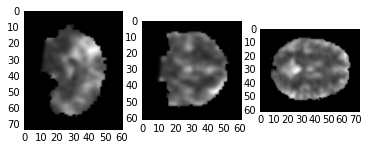

In [35]:
aslice = img[30,:,:]
bslice = img[:,35,:]
cslice = img[:,:,30]
fig, axes = plt.subplots(1, 3)
axes[0].imshow(aslice, cmap="gray")
axes[1].imshow(bslice, cmap="gray")
axes[2].imshow(cslice, cmap="gray")

In [36]:
type(img)

numpy.ndarray

In [76]:
img=np.hstack(img)
img.shape




(271633,)

In [77]:
img.max()

0.28161373734474182

In [72]:
nozeros=img[img!=0]
nozeros.shape

(61420,)

(array([   974.,   8474.,  25700.,  16179.,   6705.,   2304.,    700.,
           281.,     72.,     31.]),
 array([ 0.00241788,  0.03033746,  0.05825705,  0.08617664,  0.11409622,
         0.14201581,  0.16993539,  0.19785498,  0.22577457,  0.25369415,
         0.28161374]),
 <a list of 10 Patch objects>)

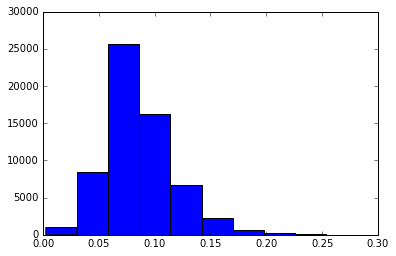

In [73]:
plt.hist(nozeros)